invite libraries for the party and set it up

In [79]:
import os
import json
import pandas as pd
import seaborn as sns 
import matplotlib as plt
import numpy as np

import the data


In [35]:
# result.json contains flattened json (so list of dicts)
f = open(os.path.join(os.getcwd(), "..", "data_collection", "json", "flat_json_hiphop_rock_jazz.json"))
json_data = json.load(f)

# Convert list of dicts to dataframe
df = pd.DataFrame(json_data) 

#### basic understanding

In [36]:
# basic data structure, columns and data
df.head()

,category.id,category.name,category.playlist.id,category.playlist.name,category.playlist.track.id,category.playlist.track.name,category.playlist.track.album.id,category.playlist.track.album.name,category.playlist.track.artist,category.playlist.track.feature.danceability,...,category.playlist.track.feature.loudness,category.playlist.track.feature.mode,category.playlist.track.feature.speechiness,category.playlist.track.feature.acousticness,category.playlist.track.feature.instrumentalness,category.playlist.track.feature.liveness,category.playlist.track.feature.valence,category.playlist.track.feature.tempo,category.playlist.track.feature.duration_ms,category.playlist.track.feature.time_signature
0,hiphop,Hip Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,2BcMwX1MPV6ZHP4tUT9uq6,Knife Talk (with 21 Savage ft. Project Pat),3SpBlxme9WbeQdI9kx7KAV,Certified Lover Boy,"Drake, 21 Savage, Project Pat",0.849,...,-9.579,0,0.324,0.0635,0,0.0834,0.153,145.887,242966,4
1,hiphop,Hip Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,3J4VKkUpLvomXJbn9ZAypO,Sharing Locations (feat. Lil Baby & Lil Durk),0q6qOUfC4ikWtv62KCnoip,Sharing Locations (feat. Lil Baby & Lil Durk),"Meek Mill, Lil Durk, Lil Baby",0.681,...,-5.585,1,0.0385,0.00383,0,0.139,0.183,151.951,161053,4
2,hiphop,Hip Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,7Bpx2vsWfQFBACRz4h3IqH,family ties (with Kendrick Lamar),3HqmX8hGcbbQZODgayNEYx,family ties (with Kendrick Lamar),"Baby Keem, Kendrick Lamar",0.711,...,-5.453,1,0.329,0.00575,0,0.231,0.144,134.14,252070,4
3,hiphop,Hip Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,52nTQQahs46s1iHFQ3Wv5Q,Pissed Me Off,70m1QwzUoogjk2DDq1hA3b,Pissed Me Off,Lil Durk,0.723,...,-10.707,0,0.485,0.00311,1.26e-06,0.115,0.223,155.967,123077,4
4,hiphop,Hip Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,4KDNRh9Oor80z3XIxdWlui,Bubbly (with Drake & Travis Scott),7IKkHmEk4It4cRdOYanyvW,Punk,"Young Thug, Drake, Travis Scott",0.91,...,-7.572,0,0.257,0.0536,0,0.127,0.599,129.011,165067,4


In [37]:
# shape (rows, columns)
print('basic shape:  ', df.shape)

# amount of each category 
print('amount of samples for ...')
print('hiphop:  ', df.loc[df['category.id'] == 'hiphop'].shape[0])
print('rock:   ' , df.loc[df['category.id'] == 'rock'].shape[0])
print('jazz:    ', df.loc[df['category.id'] == 'jazz'].shape[0])



basic shape:   (18728, 22)
amount of samples for ...
hiphop:   3313
rock:    10449
jazz:     4966


#### changing data strcture

In [38]:
# drop unneeded columns
columns_to_drop = [
    "category.name",
    "category.playlist.id",
    "category.playlist.name",
    "category.playlist.track.id",
    "category.playlist.track.name",
    "category.playlist.track.album.id",
    "category.playlist.track.album.name",
    "category.playlist.track.artist"
    ]
df = df.drop(columns=columns_to_drop)

# change column-names
df = df.rename(columns={
    "category.id": "category",
    "category.playlist.track.feature.danceability": "feature_danceability",
    "category.playlist.track.feature.energy": "feature_energy",
    "category.playlist.track.feature.key": "feature_key",
    "category.playlist.track.feature.loudness": "feature_loudness",
    "category.playlist.track.feature.mode": "feature_mode",
    "category.playlist.track.feature.speechiness": "feature_speechiness",
    "category.playlist.track.feature.acousticness": "feature_acousticness",
    "category.playlist.track.feature.instrumentalness": "feature_instrumentalness",
    "category.playlist.track.feature.liveness": "feature_liveness",
    "category.playlist.track.feature.valence": "feature_valence",
    "category.playlist.track.feature.tempo": "feature_tempo",
    "category.playlist.track.feature.duration_ms": "feature_duration_ms",
    "category.playlist.track.feature.time_signature": "feature_time_signature"
})

In [39]:
df_plot = df

df_plot['feature_danceability']      = df_plot['feature_danceability'].astype(float)
df_plot['feature_energy']            = df_plot['feature_energy'].astype(float)
df_plot['feature_key']               = df_plot['feature_key'].astype(float)
df_plot['feature_loudness']          = df_plot['feature_loudness'].astype(float)
df_plot['feature_mode']              = df_plot['feature_mode'].astype(float)
df_plot['feature_speechiness']       = df_plot['feature_speechiness'].astype(float)
df_plot['feature_acousticness']      = df_plot['feature_acousticness'].astype(float)
df_plot['feature_instrumentalness']  = df_plot['feature_instrumentalness'].astype(float)
df_plot['feature_liveness']          = df_plot['feature_liveness'].astype(float)
df_plot['feature_valence']           = df_plot['feature_valence'].astype(float)
df_plot['feature_tempo']             = df_plot['feature_tempo'].astype(float)
df_plot['feature_duration_ms']       = df_plot['feature_duration_ms'].astype(float)
df_plot

df_plot.head()

,category,feature_danceability,feature_energy,feature_key,feature_loudness,feature_mode,feature_speechiness,feature_acousticness,feature_instrumentalness,feature_liveness,feature_valence,feature_tempo,feature_duration_ms,feature_time_signature
0,hiphop,0.849,0.424,5.0,-9.579,0.0,0.3240,0.06350,0.000000,0.0834,0.153,145.887,242966.0,4
1,hiphop,0.681,0.630,1.0,-5.585,1.0,0.0385,0.00383,0.000000,0.1390,0.183,151.951,161053.0,4
2,hiphop,0.711,0.611,1.0,-5.453,1.0,0.3290,0.00575,0.000000,0.2310,0.144,134.140,252070.0,4
3,hiphop,0.723,0.516,11.0,-10.707,0.0,0.4850,0.00311,0.000001,0.1150,0.223,155.967,123077.0,4
4,hiphop,0.910,0.585,11.0,-7.572,0.0,0.2570,0.05360,0.000000,0.1270,0.599,129.011,165067.0,4


#### analyze a single feature

In [42]:
# selected feature
feature = 'feature_danceability'

In [94]:
# overall basic feature information
print('overall:')
print(df_plot[feature].describe())
#skewness and kurtosis

# skewness and kurtosis
print('\nskewness: %f' % df_plot[feature].skew())
print('kurtosis: %f'   % df_plot[feature].kurt())

overall:
count    18728.000000
mean         0.559398
std          0.166711
min          0.069200
25%          0.441000
50%          0.550000
75%          0.677000
max          0.989000
Name: feature_danceability, dtype: float64

skewness: 0.085612
kurtosis: -0.489733


In [59]:
# information for each category
df_hiphop   = df.loc[df['category'] == 'hiphop']
df_rock     = df.loc[df['category'] == 'rock']
df_jazz     = df.loc[df['category'] == 'jazz']

In [93]:
# hiphop information
print('hiphop:')
print(df_hiphop[feature].describe())

# skewness and kurtosis
print('\nskewness: %f' % df_hiphop[feature].skew())
print('kurtosis: %f'   % df_hiphop[feature].kurt())

hiphop:
count    3313.000000
mean        0.740599
std         0.131445
min         0.230000
25%         0.663000
50%         0.761000
75%         0.839000
max         0.989000
Name: feature_danceability, dtype: float64

skewness: -0.736651
kurtosis: 0.223473


In [90]:
print('jazz:')
print(df_jazz[feature].describe())

# skewness and kurtosis
print('\nskewness: %f' % df_jazz[feature].skew())
print('kurtosis: %f'   % df_jazz[feature].kurt())

jazz:
count    4966.000000
mean        0.558543
std         0.151088
min         0.086600
25%         0.446000
50%         0.552000
75%         0.671000
max         0.976000
Name: feature_danceability, dtype: float64

skewness: 0.055450
kurtosis: -0.547518


In [92]:
print('rock:')
print(df_rock[feature].describe())

# skewness and kurtosis
print('\nskewness: %f' % df_rock[feature].skew())
print('kurtosis: %f'   % df_rock[feature].kurt())

rock:
count    10449.000000
mean         0.502353
std          0.140798
min          0.069200
25%          0.406000
50%          0.505000
75%          0.598000
max          0.975000
Name: feature_danceability, dtype: float64

skewness: -0.038581
kurtosis: -0.188572


##### graphical output

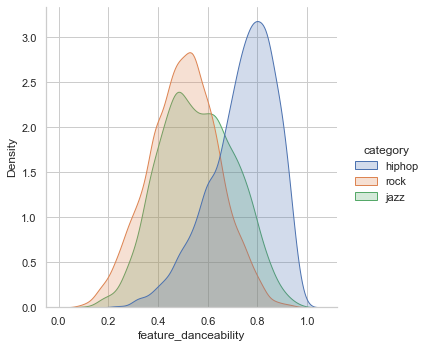

In [64]:
# distribution plot
sns.set(style="whitegrid")
ax = sns.displot(data = df_plot, x = feature, hue = df_plot['category'], kind="kde",fill=True,common_norm=False)

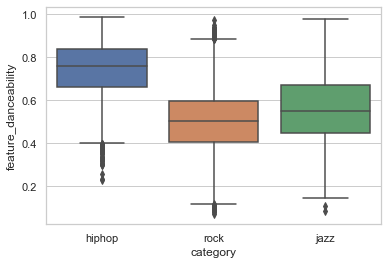

In [65]:
# boxplot for further information (similar to previous textual output)
ax = sns.boxplot(data = df_plot, x = 'category', y = feature)

#### analyze multiple features

In [66]:
df_plot.head()

,category,feature_danceability,feature_energy,feature_key,feature_loudness,feature_mode,feature_speechiness,feature_acousticness,feature_instrumentalness,feature_liveness,feature_valence,feature_tempo,feature_duration_ms,feature_time_signature
0,hiphop,0.849,0.424,5.0,-9.579,0.0,0.3240,0.06350,0.000000,0.0834,0.153,145.887,242966.0,4
1,hiphop,0.681,0.630,1.0,-5.585,1.0,0.0385,0.00383,0.000000,0.1390,0.183,151.951,161053.0,4
2,hiphop,0.711,0.611,1.0,-5.453,1.0,0.3290,0.00575,0.000000,0.2310,0.144,134.140,252070.0,4
3,hiphop,0.723,0.516,11.0,-10.707,0.0,0.4850,0.00311,0.000001,0.1150,0.223,155.967,123077.0,4
4,hiphop,0.910,0.585,11.0,-7.572,0.0,0.2570,0.05360,0.000000,0.1270,0.599,129.011,165067.0,4


In [95]:
feature_x = 'feature_loudness'
feature_y = 'feature_energy'

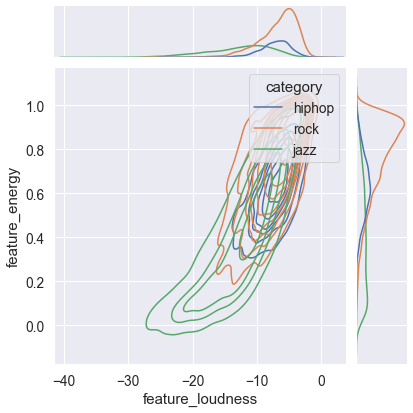

In [96]:
sns.jointplot(
    data = df_plot,
    x    = feature_x,
    y    = feature_y,
    hue  = "category",
    kind = "kde")

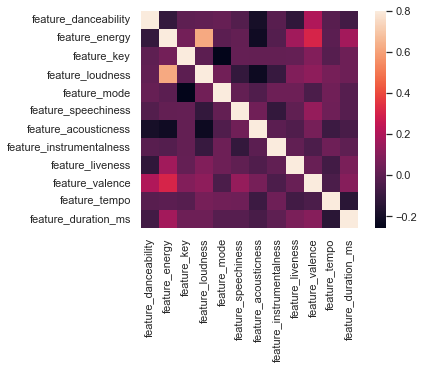

In [76]:
#correlation matrix
corrmat = df_hiphop.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

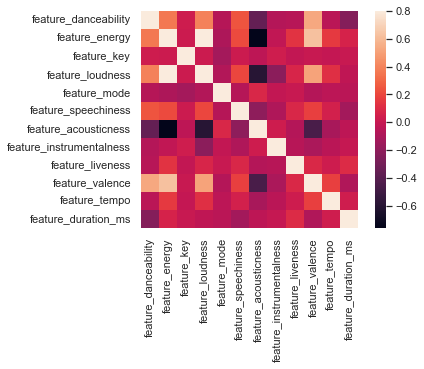

In [77]:
#correlation matrix
corrmat = df_jazz.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

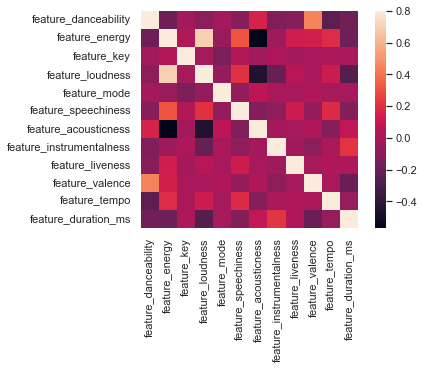

In [78]:
#correlation matrix
corrmat = df_rock.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

<AxesSubplot:>

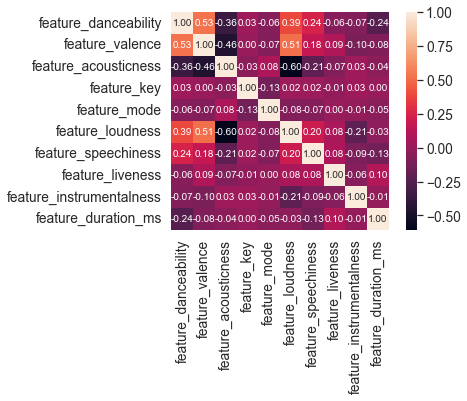

In [83]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'feature_danceability')['feature_danceability'].index
cm = np.corrcoef(df_jazz[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)